In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
import pandas as pd
car = pd.read_csv("/content/drive/MyDrive/Fraud (1)/car_data.csv")


In [ ]:
car.head()

,brand,model,year,miles,used_car_price,past_owners,accident_reported,exterior,interior,msrp_car_price
0,kia,forte,2022,41406,15988,1,0,Gray,Black,19895.000
1,chevrolet,silverado 1500,2021,15138,38008,1,1,White,Black,38876.218
2,honda,civic,2020,37190,18998,1,0,Blue,Black,22517.941
3,honda,civic,2020,27496,19498,1,0,Black,Black,22517.941
4,honda,civic,2020,29026,21000,1,1,Silver,Black,22517.941


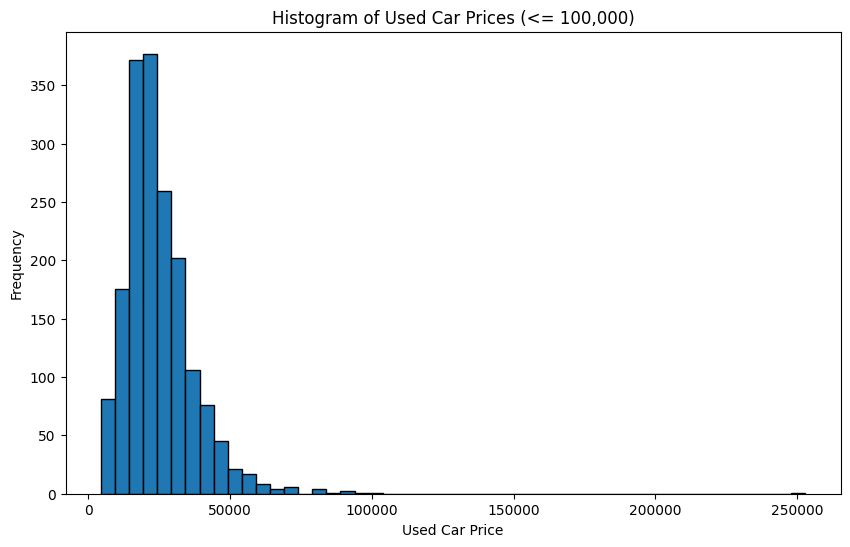

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(car['used_car_price'], bins=50, edgecolor='black')
plt.title("Histogram of Used Car Prices (<= 100,000)")
plt.xlabel("Used Car Price")
plt.ylabel("Frequency")
plt.show()

In [ ]:
len(car)

1759

In [ ]:
import pandas as pd

# Creating the DataFrame with the modified data
data = {
    "brand": ["rolls-royce"],
    "model": ["dawn"],
    "year": [2018],
    "miles": [14272],
    "used_car_price": [252900],
    "past_owners": [0],  # Modified value
    "accident_reported": [0],
    "exterior": ["White"],
    "interior": ["Beige"],
    "msrp_car_price": [335000.0]
}

df = pd.DataFrame(data)

df


,brand,model,year,miles,used_car_price,past_owners,accident_reported,exterior,interior,msrp_car_price
0,rolls-royce,dawn,2018,14272,252900,0,0,White,Beige,335000.0


In [ ]:
high_msrp_cars = car[car['used_car_price'] >= 100000]
high_msrp_cars

,brand,model,year,miles,used_car_price,past_owners,accident_reported,exterior,interior,msrp_car_price
1218,rolls-royce,dawn,2018,14272,252900,2,0,White,Beige,335000.0


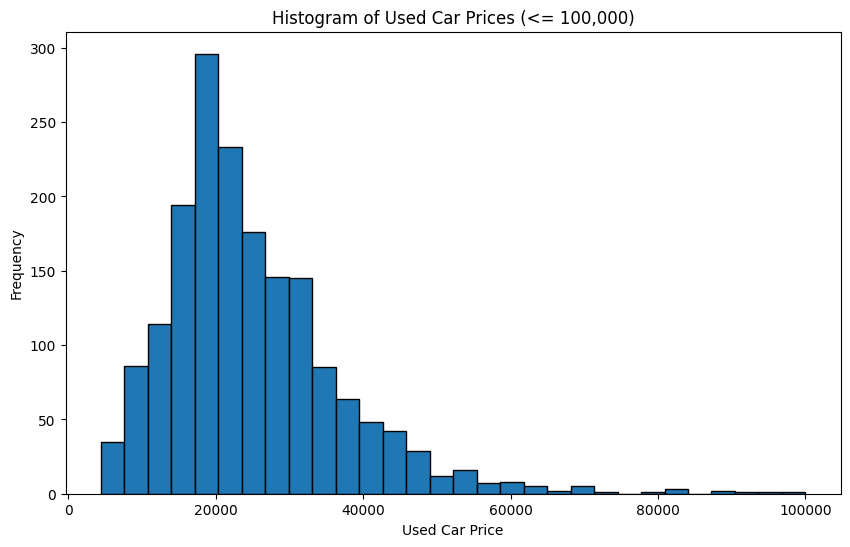

In [ ]:
high_msrp_cars = car[car['used_car_price'] <= 100000]

# Creating a histogram
plt.figure(figsize=(10, 6))
plt.hist(high_msrp_cars['used_car_price'], bins=30, edgecolor='black')
plt.title("Histogram of Used Car Prices (<= 100,000)")
plt.xlabel("Used Car Price")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# 각 열의 평균 계산
column_means = car.mean(numeric_only=True)

# 결과 출력
column_means


,0
year,2018.943150
miles,49839.447413
used_car_price,25026.093803
past_owners,1.498579
accident_reported,0.229676
msrp_car_price,35877.683632


past_owners
1    1156
2     400
3     142
4      40
5      13
0       4
7       3
8       1
Name: count, dtype: int64


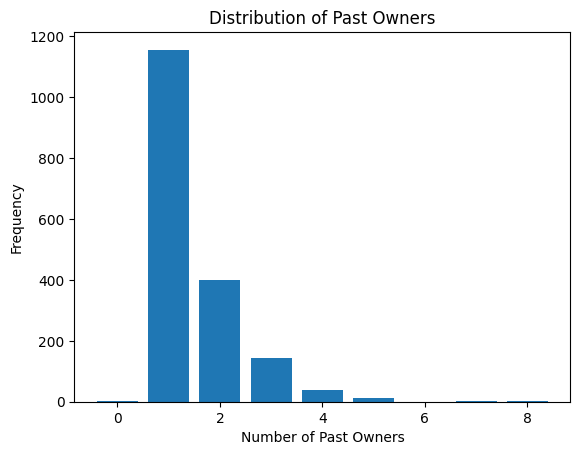

In [ ]:
import matplotlib.pyplot as plt

# 값의 빈도 계산
past_owners_distribution = car['past_owners'].value_counts()

# 분포 출력
print(past_owners_distribution)

# 분포 시각화 (막대그래프)
plt.bar(past_owners_distribution.index, past_owners_distribution.values)
plt.xlabel('Number of Past Owners')
plt.ylabel('Frequency')
plt.title('Distribution of Past Owners')
plt.show()


In [ ]:
# 'exterior'와 'interior' 열에서 'Unknown' 값이 있는 인덱스 확인
unknown_indices = car[(car['exterior'] == 'unknown') | (car['interior'] == 'unknown')].index

# 결과 출력
unknown_indices.tolist()


[]

In [ ]:
# 데이터 필터링: used_car_price가 msrp_car_price의 110%까지 허용
car_filtered = car[car['used_car_price'] <= car['msrp_car_price'] * 1.10]

# used_car_price가 100,000 이상 제거
car_filtered = car_filtered[car_filtered['used_car_price'] < 100000]

# "Unknown" 값이 포함된 관측치 제거
car_filtered = car_filtered[(car_filtered['exterior'] != "Unknown") & (car_filtered['interior'] != "Unknown")]

#car_filtered['exterior'] = car_filtered['exterior'].replace("Unknown", 1)
#car_filtered['interior'] = car_filtered['interior'].replace("Unknown", 1)

# 'past_owners' 열 값 변경:  1, 2는 0으로, 나머지는 1로 설정
car_filtered['past_owners'] = car_filtered['past_owners'].apply(lambda x: 0 if x in [1] else 1)

# exterior 인기 여부 변환
popular_exterior = ['White', 'Gray']
car_filtered['exterior'] = car_filtered['exterior'].apply(lambda x: 1 if x in popular_exterior else 0)

# interior 인기 여부 변환
popular_interior = ['Black', 'Gray']
car_filtered['interior'] = car_filtered['interior'].apply(lambda x: 1 if x in popular_interior else 0)

# 독립변수와 종속변수 정의
features = ['miles', 'exterior', 'interior','past_owners','accident_reported', 'msrp_car_price']
target = 'used_car_price'

X = car_filtered[features]
y = car_filtered[target]

# X에 상수 추가 (OLS 모델을 위한 절편)
X_sm = sm.add_constant(X)

# OLS 모델 적합
ols_model = sm.OLS(y, X_sm)
ols_results = ols_model.fit()

# OLS 회귀 결과 요약 출력
print(ols_results.summary())

                            OLS Regression Results                            
Dep. Variable:         used_car_price   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     510.6
Date:                Tue, 19 Nov 2024   Prob (F-statistic):               0.00
Time:                        07:35:17   Log-Likelihood:                -16631.
No. Observations:                1642   AIC:                         3.328e+04
Df Residuals:                    1635   BIC:                         3.331e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.884e+04    700.82

In [ ]:
car_filtered

,brand,model,year,miles,used_car_price,past_owners,accident_reported,exterior,interior,msrp_car_price
0,kia,forte,2022,41406,15988,0,0,1,1,19895.000
1,chevrolet,silverado 1500,2021,15138,38008,0,1,1,1,38876.218
2,honda,civic,2020,37190,18998,0,0,0,1,22517.941
3,honda,civic,2020,27496,19498,0,0,0,1,22517.941
4,honda,civic,2020,29026,21000,0,1,0,1,22517.941
...,...,...,...,...,...,...,...,...,...,...
1754,honda,civic,2015,150105,8495,0,1,1,1,22517.941
1755,bmw,3 series,2020,24655,29998,0,0,0,0,40897.059
1756,mercedes-benz,r-class,2009,120694,9495,1,1,0,1,51435.000
1757,mercedes-benz,glc,2022,27894,29999,1,0,1,1,40050.000


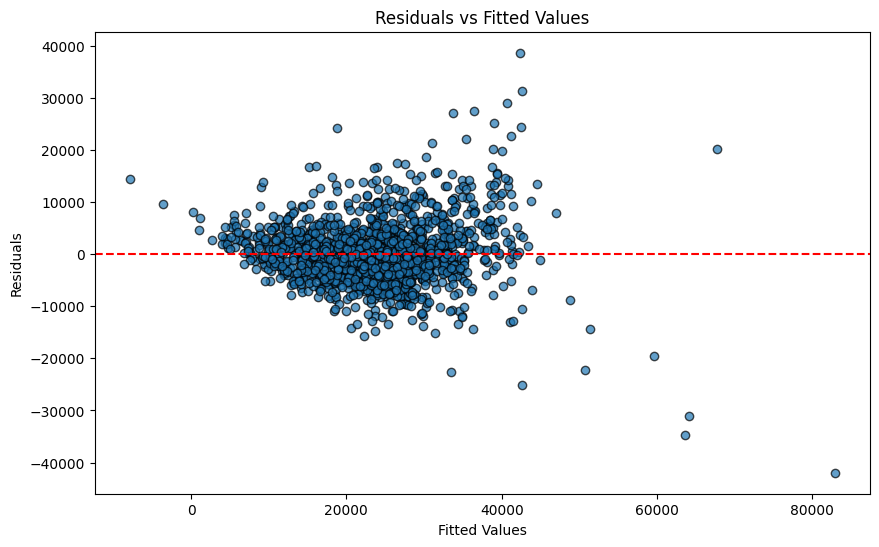

In [ ]:
residuals = ols_results.resid
fitted = ols_results.fittedvalues

plt.figure(figsize=(10, 6))
plt.scatter(fitted, residuals, alpha=0.7, edgecolor='k')
plt.axhline(0, color='red', linestyle='--', linewidth=1.5)
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

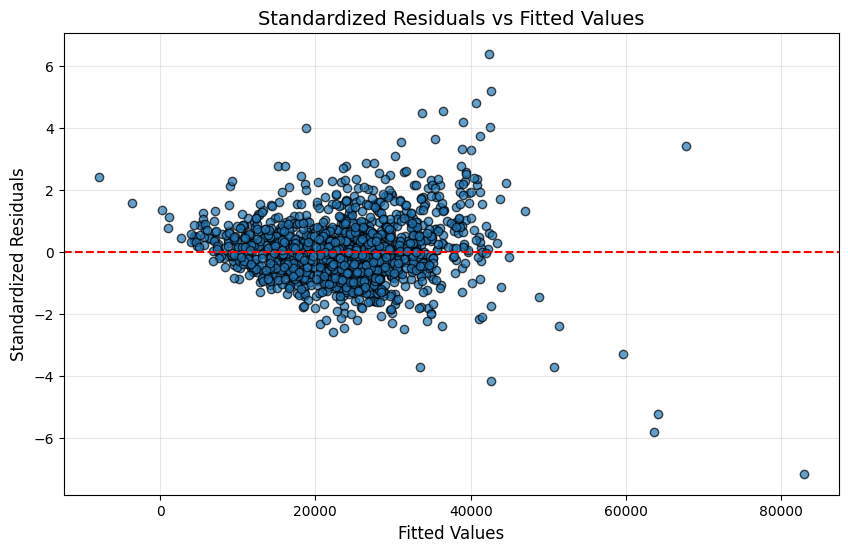

In [ ]:
from statsmodels.stats.outliers_influence import OLSInfluence

# 표준화 잔차 계산
standardized_residuals = OLSInfluence(ols_results).resid_studentized_internal
fitted = ols_results.fittedvalues

# Residuals vs Fitted plot with standardized residuals
plt.figure(figsize=(10, 6))
plt.scatter(fitted, standardized_residuals, alpha=0.7, edgecolor='k')
plt.axhline(0, color='red', linestyle='--', linewidth=1.5)
plt.title('Standardized Residuals vs Fitted Values', fontsize=14)
plt.xlabel('Fitted Values', fontsize=12)
plt.ylabel('Standardized Residuals', fontsize=12)
plt.grid(alpha=0.3)
plt.show()



<Figure size 1000x600 with 0 Axes>

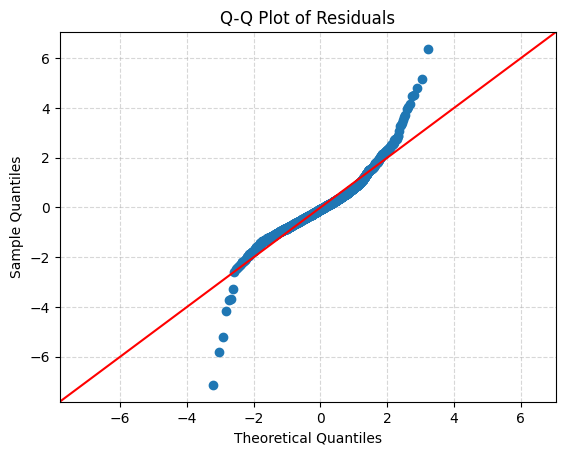

In [ ]:
import scipy.stats as stats

# Q-Q 플롯 그리기
plt.figure(figsize=(10, 6))
sm.qqplot(standardized_residuals, line='45', fit=True)
plt.title("Q-Q Plot of Residuals")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


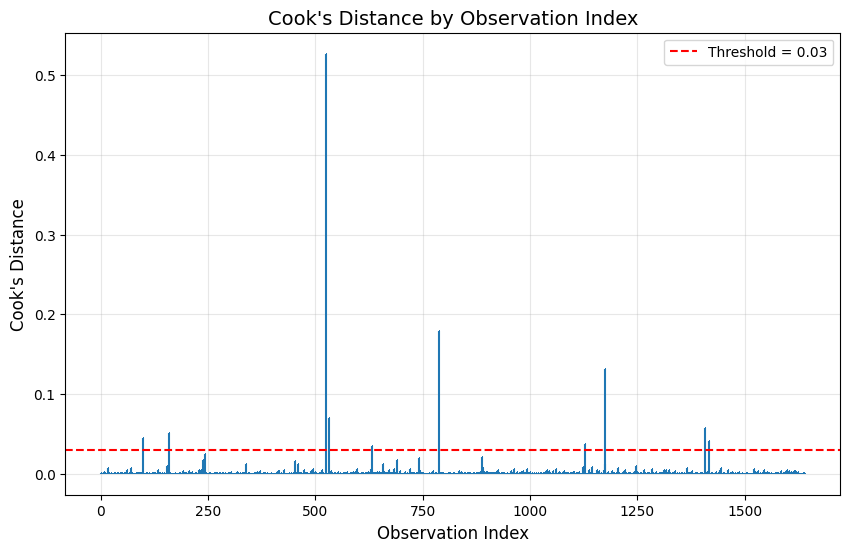

In [ ]:
# Cook's Distance 계산 및 시각화
from statsmodels.stats.outliers_influence import OLSInfluence

# Cook's Distance 계산
influence = OLSInfluence(ols_results)
cooks_d = influence.cooks_distance[0]

# Cook's Distance Index Plot
plt.figure(figsize=(10, 6))
plt.stem(np.arange(len(cooks_d)), cooks_d, markerfmt=",", basefmt=" ")
plt.axhline(0.03, color='red', linestyle='--', linewidth=1.5, label='Threshold = 0.03')
plt.title("Cook's Distance by Observation Index", fontsize=14)
plt.xlabel('Observation Index', fontsize=12)
plt.ylabel("Cook's Distance", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import OLSInfluence
import matplotlib.pyplot as plt


X = car_filtered[features]
y = car_filtered[target]

# 상수 추가
X_sm = sm.add_constant(X)

# OLS 모델 적합
ols_model = sm.OLS(y, X_sm)
ols_results = ols_model.fit()

# 영향 통계 계산
influence = OLSInfluence(ols_results)
cooks_d, _ = influence.cooks_distance

# Cook's Distance 임계값 설정
threshold = 0.03
influential_points = np.where(cooks_d > threshold)[0]

print(f"임계값({threshold:.2f})을 초과한 관측치:\n{influential_points}")
print("\n","특이값 개수 : ",len(influential_points))

# 데이터프레임과 시리즈의 인덱스 재설정
X_sm = X_sm.reset_index(drop=True)
y = y.reset_index(drop=True)

# 영향력이 큰 관측치 제거
filtered_X = X_sm.drop(index=influential_points, axis=0)
filtered_y = y.drop(index=influential_points, axis=0)

# 새로운 OLS 모델 적합
filtered_model = sm.OLS(filtered_y, filtered_X)
filtered_results = filtered_model.fit()


# 재적합된 모델 결과 출력
print(filtered_results.summary())


임계값(0.03)을 초과한 관측치:
[  98  160  525  532  632  789 1128 1175 1407 1417]

 특이값 개수 :  10
                            OLS Regression Results                            
Dep. Variable:         used_car_price   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     587.9
Date:                Tue, 19 Nov 2024   Prob (F-statistic):               0.00
Time:                        07:35:19   Log-Likelihood:                -16391.
No. Observations:                1632   AIC:                         3.280e+04
Df Residuals:                    1625   BIC:                         3.283e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

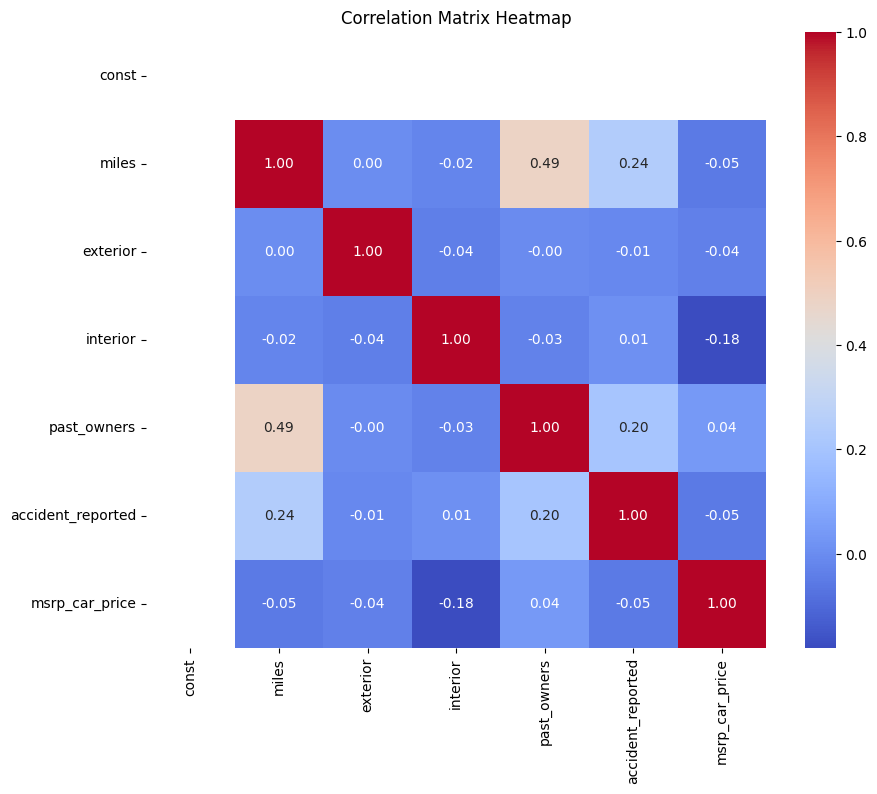

In [ ]:
import seaborn as sns

# 변수 간 상관계수 계산
correlation_matrix = filtered_X.corr()

# 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF 계산 함수
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# 상수항 제거 (VIF 계산에는 포함하지 않음)
X_vif = filtered_X.drop(columns=["const"], errors="ignore")

# VIF 계산
vif_df = calculate_vif(X_vif)

# VIF 출력
print(vif_df)


             Feature       VIF
0              miles  3.908097
1           exterior  1.838067
2           interior  4.605013
3        past_owners  2.061892
4  accident_reported  1.409894
5     msrp_car_price  4.239485


In [ ]:
# 특이값으로 분류된 데이터를 추출하여 데이터프레임 생성X
outliers_df = car_filtered.iloc[influential_points]

outliers_df


,brand,model,year,miles,used_car_price,past_owners,accident_reported,exterior,interior,msrp_car_price
102,maserati,quattroporte,2019,66469,28421,0,0,0,0,119415.385
170,maserati,granturismo,2014,52973,39999,1,0,0,0,145993.000
564,aston martin,db9,2008,20938,40900,1,0,0,1,196522.500
572,audi,r8,2012,33944,88000,1,0,0,1,158819.600
675,audi,a8,2013,51583,17499,1,1,1,1,94850.000
848,maserati,granturismo,2010,26107,28965,1,1,0,1,145993.000
1211,chevrolet,corvette,2015,5369,69695,1,0,0,0,71505.333
1260,maserati,granturismo,2011,22571,32999,1,0,0,0,145993.000
1503,audi,s7,2022,16155,73865,1,1,1,0,82050.000
1514,cadillac,escalade,2021,38017,80991,0,0,0,1,81037.333


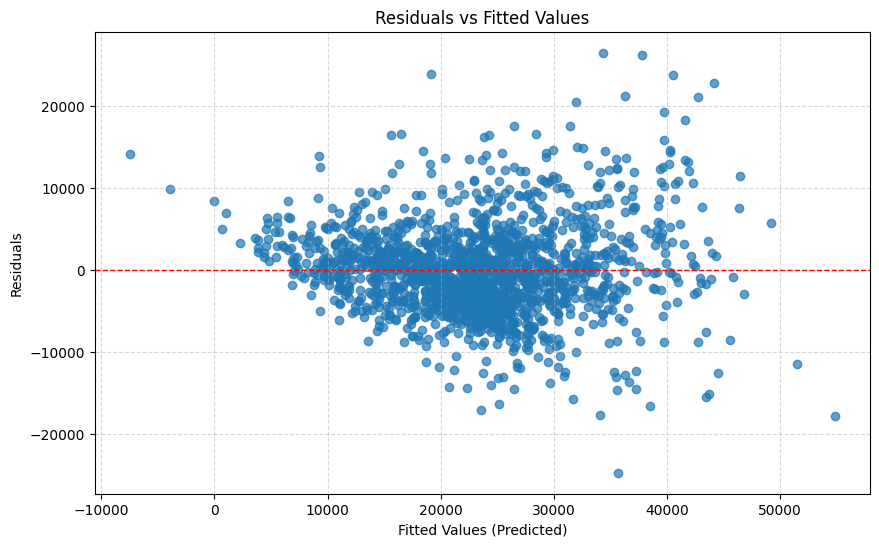

In [ ]:
# 잔차 계산
predicted = filtered_results.fittedvalues  # 예측 값
residuals = filtered_results.resid         # 잔차

# 잔차 플롯 그리기
plt.figure(figsize=(10, 6))
plt.scatter(predicted, residuals, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.title("Residuals vs Fitted Values")
plt.xlabel("Fitted Values (Predicted)")
plt.ylabel("Residuals")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


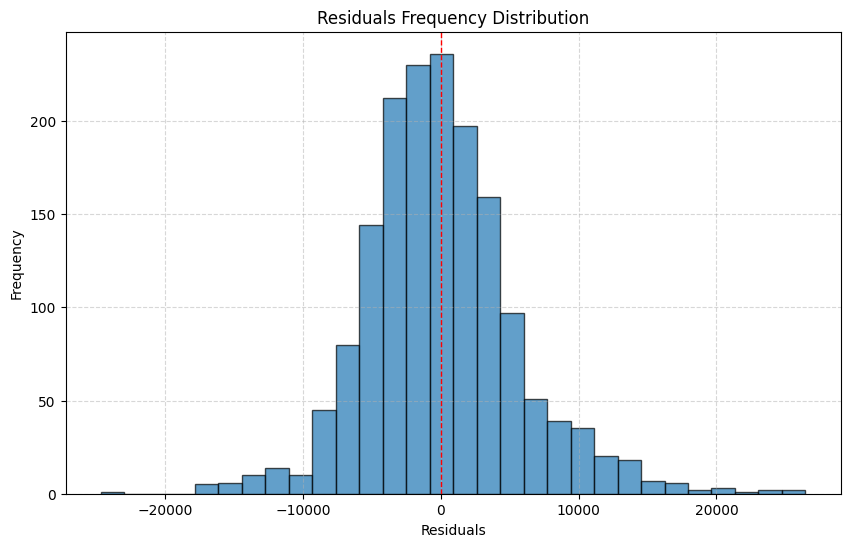

In [ ]:
# 잔차의 빈도수 분포 플롯
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, alpha=0.7, edgecolor='black')
plt.axvline(x=0, color='red', linestyle='--', linewidth=1)
plt.title("Residuals Frequency Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


<Figure size 1000x600 with 0 Axes>

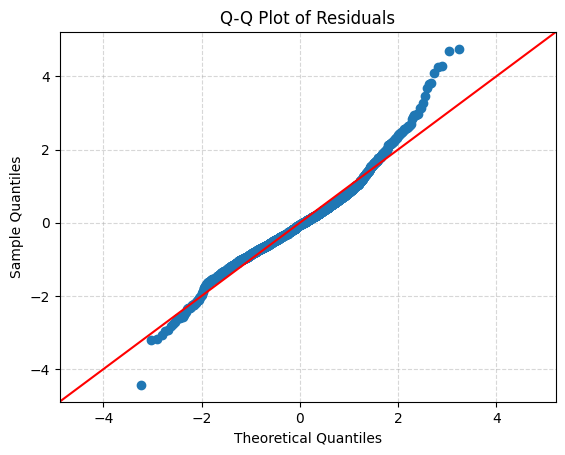

In [ ]:
import scipy.stats as stats

# Q-Q 플롯 그리기
plt.figure(figsize=(10, 6))
sm.qqplot(residuals, line='45', fit=True)
plt.title("Q-Q Plot of Residuals")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


In [ ]:

# 종속변수 표준화
y_standardized = (filtered_y - filtered_y.mean()) / filtered_y.std()

# 새로운 OLS 모델 적합 (표준화된 y 사용)
standardized_model = sm.OLS(y_standardized, filtered_X)
standardized_results = standardized_model.fit()

# 재적합된 모델 결과 출력
print(standardized_results.summary())

                            OLS Regression Results                            
Dep. Variable:         used_car_price   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     587.9
Date:                Tue, 19 Nov 2024   Prob (F-statistic):               0.00
Time:                        07:35:20   Log-Likelihood:                -1373.5
No. Observations:                1632   AIC:                             2761.
Df Residuals:                    1625   BIC:                             2799.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.6416      0.06

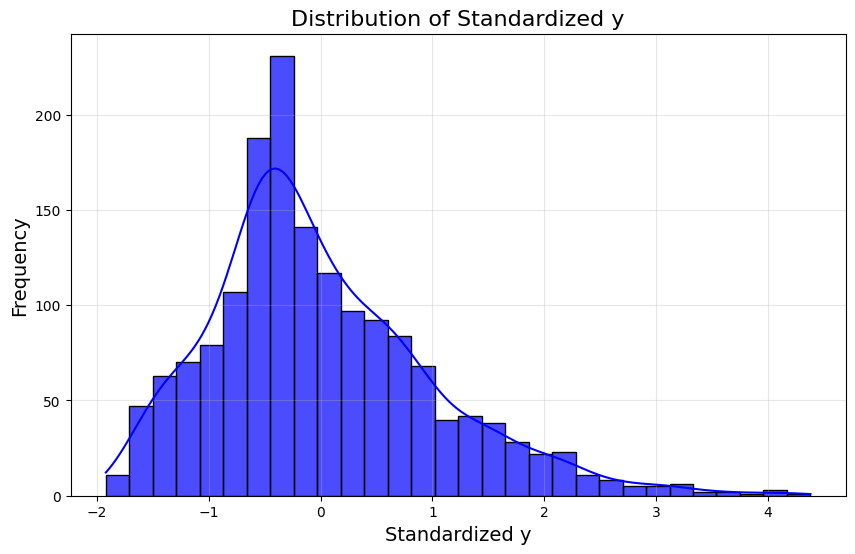

In [ ]:
# y_standardized 분포 시각화
plt.figure(figsize=(10, 6))
sns.histplot(y_standardized, kde=True, bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Standardized y', fontsize=16)
plt.xlabel('Standardized y', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(alpha=0.3)
plt.show()

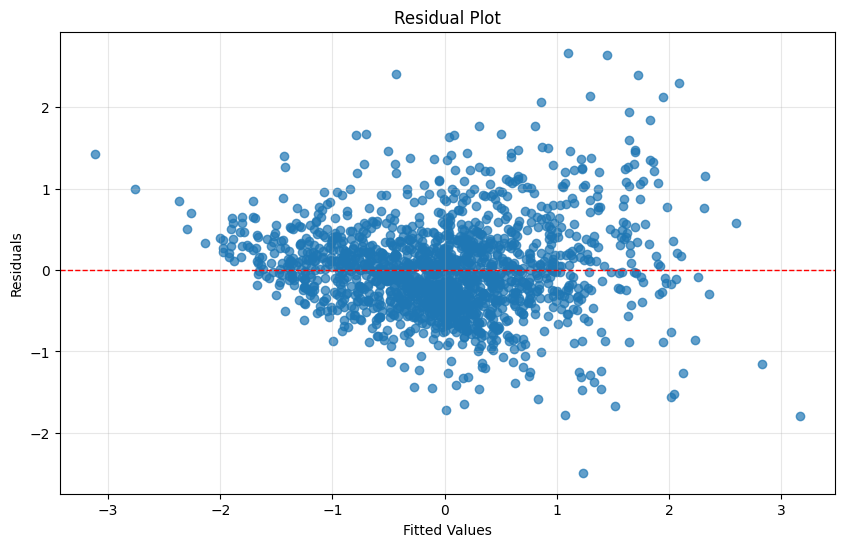

In [ ]:
# 잔차 계산
residuals = standardized_results.resid

# 잔차 플롯
plt.figure(figsize=(10, 6))
plt.scatter(standardized_results.fittedvalues, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--', linewidth=1)
plt.title('Residual Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.grid(alpha=0.3)
plt.show()

In [ ]:
# 잔차(residuals)를 이용한 SSE 계산
residuals = ols_results.resid  # 잔차 (실제 값 - 예측 값)
sse = np.sum(residuals**2)  # 잔차 제곱합
print(f"SSE: {sse}")


SSE: 60304357089.40452
